<a href="https://colab.research.google.com/github/Nyounggu/machine-learning/blob/master/%EB%86%8D%EA%B5%AC%EC%84%A0%EC%88%98%EC%9D%98_%EA%B2%8C%EC%9E%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%ED%8F%AC%EC%A7%80%EC%85%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/나의 첫 머신러닝  딥러닝/data/machine-learning-master/data/csv/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [64]:
# 현재 데이터에서 포지션의 개수를 확인한다
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'STL ans 2P in 2d plane')

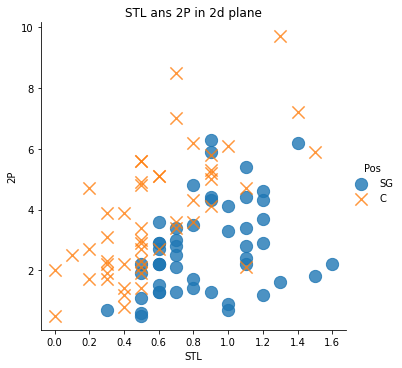

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL','2P', data = df, fit_reg = False, # fit_reg : 라인X
           scatter_kws = {"s" : 150}, # 좌표 상의 점의 크기
           markers = ["o","x"], 
           hue = "Pos") 

# 타이틀
plt.title('STL ans 2P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AST ans 2P in 2d plane')

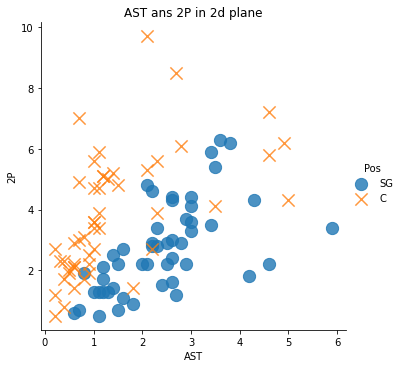

In [66]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot('AST','2P', data = df, fit_reg = False, 
           scatter_kws = {"s" : 150},
           markers = ["o","x"],
           hue = "Pos")

# 타이틀
plt.title('AST ans 2P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BLK ans 3P in 2d plane')

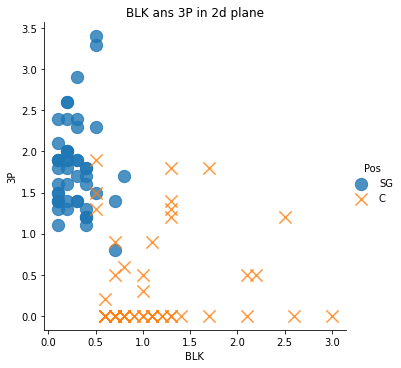

In [67]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot('BLK','3P', data = df, fit_reg = False, 
           scatter_kws = {"s" : 150},
           markers = ["o","x"],
           hue = "Pos")

# 타이틀
plt.title('BLK ans 3P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TRB ans 3P in 2d plane')

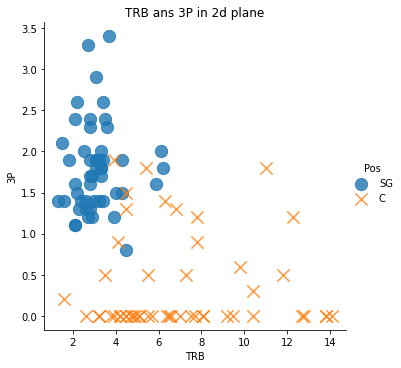

In [68]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB','3P', data = df, fit_reg = False, 
           scatter_kws = {"s" : 150},
           markers = ["o","x"],
           hue = "Pos")

# 타이틀
plt.title('TRB ans 3P in 2d plane')

In [69]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다
df.drop(['2P','AST','STL'], axis =1, inplace = True )

# axis = 0 : 행
# axis = 1 : 열

In [70]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [71]:
# 사이킷런의 train_test_split을 사용하면 
# 코드 한 줄로 손쉽게 데이터를 나눌 수 있습니다
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

In [72]:
train.shape[0]


80

In [73]:
test.shape[0]

20

In [74]:
# kNN 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를
# 3부터 학습데이터 절반까지 지정

max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
  k_list.append(i)

cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                           scoring = 'accuracy')
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.925,
 0.9125,
 0.925,
 0.925,
 0.9375,
 0.9125,
 0.9125,
 0.925,
 0.9125,
 0.925,
 0.9125,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.8375,
 0.8375]

In [78]:
x_train

,3P,BLK,TRB
92,0.5,2.1,7.3
58,2.6,0.2,3.4
77,0.0,0.7,4.7
10,0.0,0.7,5.1
97,1.8,0.4,3.3
...,...,...,...
48,0.5,1.0,5.5
91,1.2,1.3,12.3
89,3.4,0.5,3.7
36,1.7,0.8,3.3


In [80]:
y_train.values.ravel()

array(['C', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'C', 'C',
       'C', 'SG', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG',
       'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'C',
       'C', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG',
       'SG', 'C', 'C', 'C', 'C', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'SG',
       'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG',
       'C', 'C', 'C', 'C', 'C', 'C', 'SG', 'SG', 'C'], dtype=object)

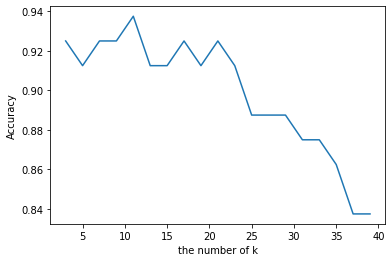

In [75]:
# k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [76]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('The best number of k : '+ str(k))

The best number of k : 11


In [77]:
# 모델테스트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors= k)

# 학습에 사용될 속성을 지정
x_train = train[['3P','BLK','TRB']]
# 선수 포지션을 예측값으로 지정
y_train = train[['Pos']]

# kNN 모델 학습
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P','BLK','TRB']]

# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print('accuracy : '+ str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.85


In [81]:
comparison = pd.DataFrame({'prediction':pred, 
                           'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,C,C
3,C,SG
4,SG,SG
5,SG,C
6,SG,SG
7,C,C
8,C,C
9,C,C
